In [ ]:
import keras 
import keras.layers as L

image_size = (512, 512)
Seed = 42



In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import albumentations as A
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense,Flatten
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D
from keras.models import Sequential

from ipywidgets import widgets, interact

import warnings
warnings.filterwarnings("ignore")


In [10]:
tumor_d = "C:/Users/Arya Singh/Desktop/Brain Tumor Data Set/Brain Tumor" 
healthy_d = "C:/Users/Arya Singh/Desktop/Brain Tumor Data Set/Healthy"

# Reading the csv file that contain the data about the images
dataf = pd.read_csv("metadata.csv")
dataf = dataf.drop(dataf.columns[0], axis=1)


In [11]:
dataf.tail()

,image,class,format,mode,shape
4595,Not Cancer (995).jpg,normal,JPEG,RGB,"(168, 300, 3)"
4596,Not Cancer (996).jpg,normal,JPEG,RGB,"(509, 452, 3)"
4597,Not Cancer (997).jpg,normal,JPEG,RGB,"(197, 177, 3)"
4598,Not Cancer (998).jpg,normal,JPEG,RGB,"(217, 232, 3)"
4599,Not Cancer (999).jpg,normal,JPEG,RGB,"(221, 228, 3)"


In [14]:
@interact(column = dataf.columns)
def column_info(column):
    print("*" * 10, column, "*" * 10)
    display(dataf[column].value_counts())
    
    display(dataf[column].describe())
    

interactive(children=(Dropdown(description='column', options=('image', 'class', 'format', 'mode', 'shape'), va…

In [6]:
tumor = [os.path.join(tumor_d, dataf.iloc[i, 0]) for i in range(len(dataf)) if dataf.iloc[i, 1] == 'tumor']
healthy = [os.path.join(healthy_d, dataf.iloc[i, 0]) for i in range(len(dataf)) if dataf.iloc[i, 1] != 'tumor']



In [7]:
import random

# Shuffle the lists
random.shuffle(tumor)
random.shuffle(healthy)

# Calculate the split index
split_index_tumor = int(len(tumor) * 0.8)
split_index_healthy = int(len(healthy) * 0.8)

# Split the data into training and testing sets
tumor_train = tumor[:split_index_tumor]
tumor_test = tumor[split_index_tumor:]

healthy_train = healthy[:split_index_healthy]
healthy_test = healthy[split_index_healthy:]

# Print the results
train_data_count = len(tumor_train) + len(healthy_train)
test_data_count = len(tumor_test) + len(healthy_test)

print('Train Data  = {}'.format(train_data_count))
print('# of train_tumor  = {}'.format(len(tumor_train)))
print('# of train_healthy = {}'.format(len(healthy_train)))



print('Test Data  = {}'.format(test_data_count))
print('# of test_tumor = {}'.format(len(tumor_test)))
print('# of test_healthy = {}'.format(len(healthy_test)))


Train Data  = 3679
# of train_tumor  = 2010
# of train_healthy = 1669
Test Data  = 921
# of test_tumor = 503
# of test_healthy = 418


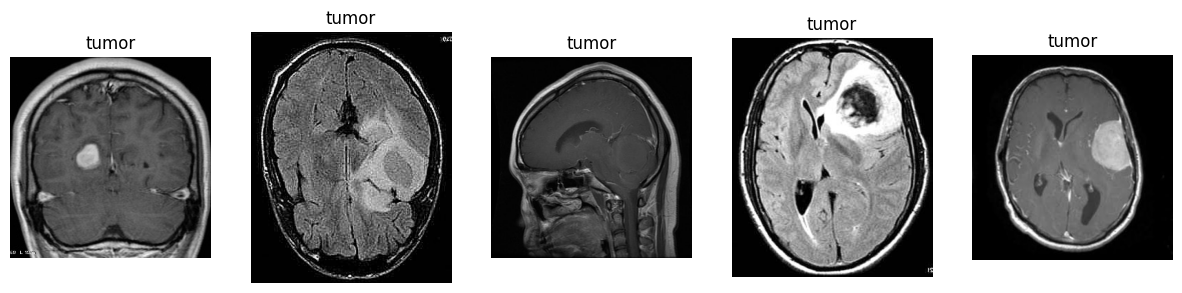

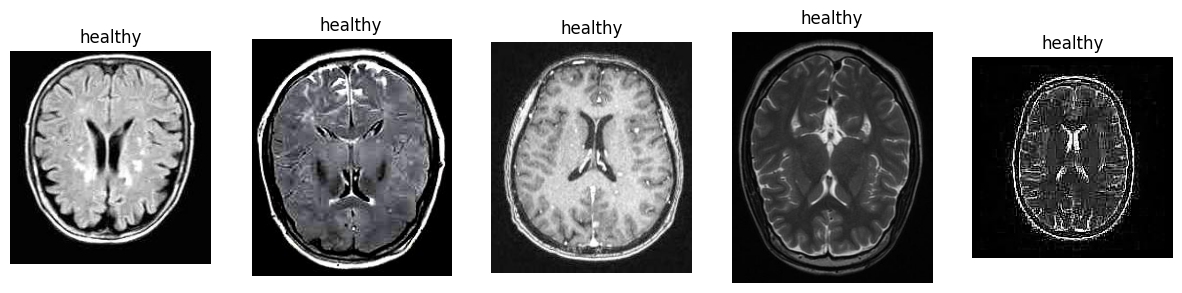

NameError: name 'tumor_train_aug' is not defined

In [8]:
import matplotlib.pyplot as plt
import random
import cv2

def plot_images(data, image_title, num_of_images, from_memory=False):
    plt.figure(figsize=(15, 10))
    for i in range(num_of_images):
        if from_memory:
            # If data contains in-memory images (numpy arrays)
            random_image = random.choice(data)
        else:
            # If data contains file paths
            random_image_path = random.choice(data)
            random_image = cv2.imread(random_image_path)
            
            if random_image is None:
                print(f"Error: Could not read image {random_image_path}")
                continue
            
            random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_of_images, i + 1)
        plt.imshow(random_image)
        plt.axis('off')
        plt.title(image_title)
    
    plt.show()

# Example usage with file paths
plot_images(tumor_train, 'tumor', 5, from_memory=False)
plot_images(healthy_train, 'healthy', 5, from_memory=False)

# Example usage with in-memory images (numpy arrays)
plot_images(tumor_train_aug, 'tumor', 5, from_memory=True)
plot_images(healthy_train_aug, 'healthy', 5, from_memory=True)


In [ ]:
import matplotlib.pyplot as plt

def make_bar(data, labels, colors, title):
    plt.figure(figsize=(16, 5))
    plt.bar(labels, data, color=colors)
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Count')
    for i, v in enumerate(data):
        plt.text(i, v + 10, str(v), ha='center', va='bottom')
    plt.show()

data = [len(tumor_train), len(healthy_train)]
labels = ['tumor', 'healthy']
colors = ['pink', 'green']
make_bar(data, labels, colors, 'Categories distribution')


IMAGE AUGMENTATION AND PREPROCESSING 
       

In [ ]:
def image_augmentation(data, target, p=0.5):
    images = []
    albumentations_list = [
        A.RandomBrightness(limit=0.5, p=p), 
        A.RGBShift(p=p), 
        A.RandomContrast(limit=0.5, p=p),
        A.Rotate(p=p, limit=40), 
        A.RandomCrop(p=p, height=200, width=200)
    ]
    
    while len(images) < target:
        for image in data:
            img = cv2.imread(image)
            if img is None:
                print(f"Error: Could not read image {image}")
                continue
            img = cv2.resize(img, (256, 256))
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if len(img.shape) == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            
            operation = random.choice(albumentations_list)
            img = operation(image=img)['image']
            if img.shape[0] != 256:
                img = cv2.resize(img, (256, 256))
    
            images.append(img)
            if len(images) >= target:
                break
    return np.array(images)

tumor_train_aug = image_augmentation(tumor_train, 5000)
healthy_train_aug = image_augmentation(healthy_train, 5000)


In [ ]:
print ('Train Data = {}'.format(len(tumor_train_aug)+len(healthy_train_aug)))
print ('# of train_tumor_aug = {}'.format(len(tumor_train_aug)))
print ('# of train_healthy_aug = {}'.format(len(healthy_train_aug)))

import matplotlib.pyplot as plt

# Data
counts = [len(tumor_train_aug), len(healthy_train_aug)]
labels = ['Tumor', 'Healthy']
colors = ['green', 'pink']

# Create the bar graph
def make_bar_graph(counts, labels, colors, title):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color=colors)
    
    # Add the counts on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom')
    
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('Category')
    plt.show()

# Plot the bar graph
make_bar_graph(counts, labels, colors, 'Data after balancing')



In [ ]:
plot_images(tumor_train_aug , 'tumor', 5)
plot_images(healthy_train_aug , 'healthy ', 5)


In [ ]:
 def preprocess_test_data(data):
    images = []
    for image in data:
        img = cv2.resize(cv2.imread(image),(256, 256))
        if len (img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if len (img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        images.append(img)
    return np.array(images)

In [ ]:
tumor_test = preprocess_test_data(tumor_test)
healthy_test = preprocess_test_data(healthy_test)

In [ ]:
# Show some images after preprocessing
plot_images(tumor_test,'tumor', 5)
plot_images(healthy_test,'healthy', 5)

In [ ]:
X_train = np.concatenate([tumor_train_aug,healthy_train_aug],axis = 0)
X_test = np.concatenate([tumor_test,healthy_test],axis = 0)

# {0 => tumor & 1 => healthy}
y_train = np.concatenate([np.zeros(len(tumor_train_aug)), np.ones(len(healthy_train_aug))])
y_test = np.concatenate([np.zeros(len(tumor_test)), np.ones(len(healthy_test))])

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=16, shuffle=True)
test_generator = test_datagen.flow(X_test, y_test, batch_size=16, shuffle=True)

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=(256,256,3)))

model.add(Conv2D(16, (3*3), activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(32, (3*3), activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(16, (3*3), activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.5e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=5,validation_data=test_generator)


In [ ]:
model.summary()

In [ ]:
tarin_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(tarin_acc, c = 'b', label = 'training accuracy')
plt.plot(val_acc, c = 'r', label = 'validation accuracy')
plt.title('Model Accuracy', loc ='right')
plt.legend()
plt.show()


In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, c = 'b', label = 'training loss')
plt.plot(val_loss, c = 'r', label = 'validation loss')
plt.title('Model Loss', loc ='right')
plt.legend()
plt.show()

In [ ]:
img = cv2.imread("C:/Users/Arya Singh/Desktop/Brain Tumor Data Set/Healthy/Not Cancer  (2).jpeg")
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))

yhat = model.predict(np.expand_dims(resized/255, 0))
if yhat > 0.5:
    print("The predicted class is Healthy Brain")
else:
    print("The predicted class is Tumor Brain")

In [ ]:
img = cv2.imread("C:/Users/Arya Singh/Desktop/Brain Tumor Data Set/Brain Tumor/Cancer (19).tif")
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))

yhat = model.predict(np.expand_dims(resized/255, 0))
if yhat > 0.5:
    print("The predicted class is Healthy Brain")
else:
    print("The predicted class is Tumor Brain")